In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

(800, 1200, 3)


<IPython.core.display.Javascript object>


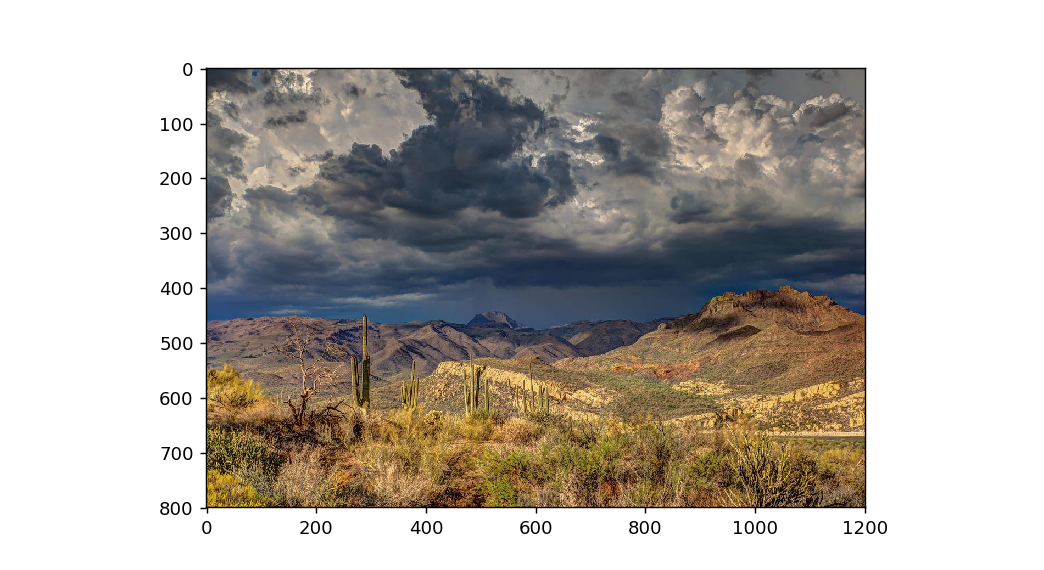

In [3]:
im = imread('desert.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

uint8


<IPython.core.display.Javascript object>


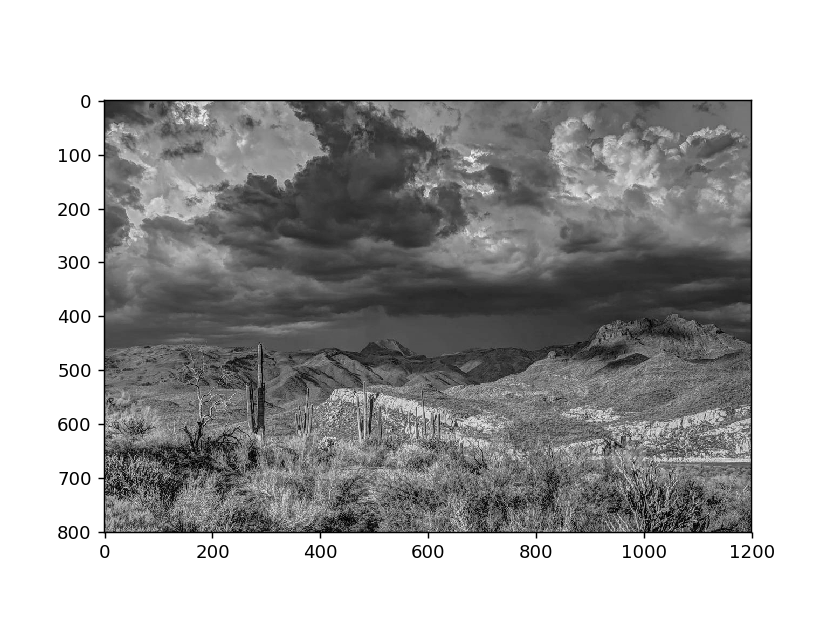

In [4]:
from skimage.color import rgb2gray

imgray = (rgb2gray(im)*255).astype('uint8')
print(imgray.dtype)
plt.figure()
plt.imshow(imgray, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


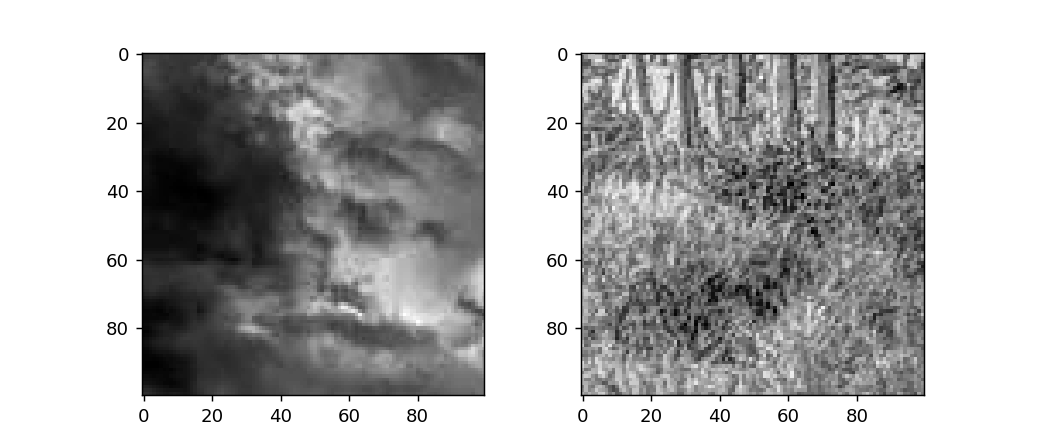

In [5]:
nsize = (100,100)

region_cloud = imgray[100:100+nsize[0],800:800+nsize[1]]
region_desert = imgray[600:600+nsize[0],550:550+nsize[1]]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(region_cloud, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(region_desert, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


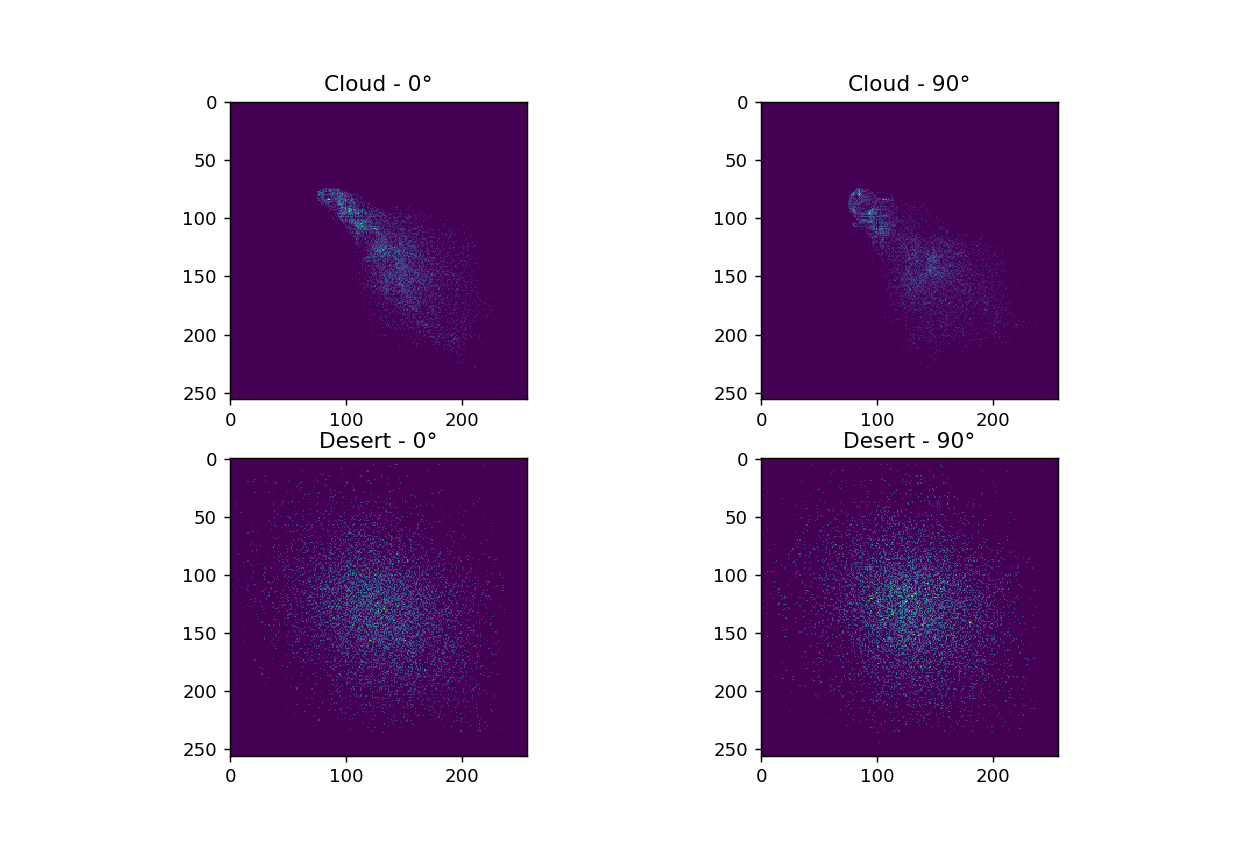

In [6]:
from skimage.feature import greycomatrix,greycoprops

angles = [0,np.pi/2]
displacements = [10]

glcm_c = greycomatrix(region_cloud, displacements, angles, 256, normed=True)
glcm_d = greycomatrix(region_desert, displacements, angles, 256, normed=True)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(glcm_c[:,:,0,0])
plt.title('Cloud - 0°')
plt.subplot(2,2,2)
plt.imshow(glcm_c[:,:,0,1])
plt.title('Cloud - 90°')
plt.subplot(2,2,3)
plt.imshow(glcm_d[:,:,0,0])
plt.title('Desert - 0°')
plt.subplot(2,2,4)
plt.imshow(glcm_d[:,:,0,1])
plt.title('Desert - 90°')
plt.show()

<IPython.core.display.Javascript object>


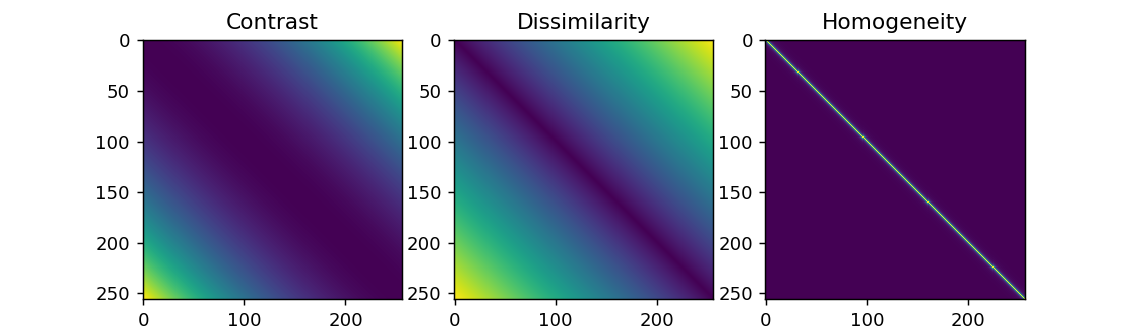

<IPython.core.display.Javascript object>


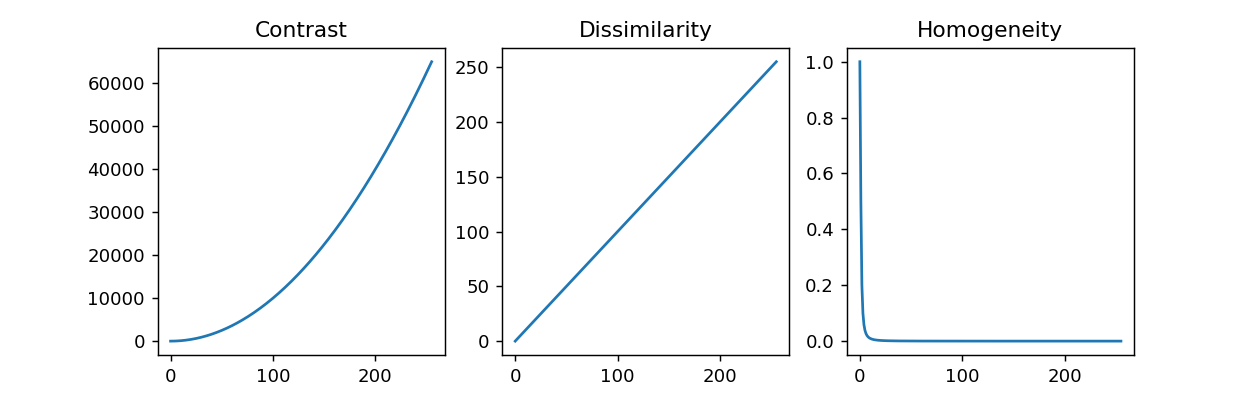

In [7]:
w_contrast = np.zeros((256,256))
w_diss = np.zeros((256,256))
w_hom = np.zeros((256,256))
for i in range(256):
    for j in range(256):
        w_contrast[i,j] = (i-j)**2
        w_diss[i,j] = np.abs(i-j)
        w_hom[i,j] = 1/(1+(i-j)**2)
        
plt.figure()
plt.subplot(1,3,1)
plt.imshow(w_contrast)
plt.title('Contrast')
plt.subplot(1,3,2)
plt.imshow(w_diss)
plt.title('Dissimilarity')
plt.subplot(1,3,3)
plt.imshow(w_hom)
plt.title('Homogeneity')
plt.show()

w_contrast = np.zeros((256,))
w_diss = np.zeros((256,))
w_hom = np.zeros((256,))
for i in range(256):
        w_contrast[i] = i**2
        w_diss[i] = i
        w_hom[i] = 1/(1+i**2)
plt.figure()
plt.subplot(1,3,1)
plt.plot(w_contrast)
plt.title('Contrast')
plt.subplot(1,3,2)
plt.plot(w_diss)
plt.title('Dissimilarity')
plt.subplot(1,3,3)
plt.plot(w_hom)
plt.title('Homogeneity')
plt.show()

In [10]:
h_gc = np.eye(256)
h_gc /= h_gc.sum()
print(greycoprops(h_gc.reshape((256,256,1,1)), 'ASM'))
h_flat = np.ones((256,256))
h_flat /= h_flat.sum()
print(greycoprops(h_flat.reshape((256,256,1,1)), 'ASM'))

[[0.00390625]]
[[1.52587891e-05]]


In [11]:
h_gc = np.eye(256)
h_gc /= h_gc.sum()
print(greycoprops(h_gc.reshape((256,256,1,1)), 'correlation'))
h_flat = np.ones((256,256))
h_flat /= h_flat.sum()
print(greycoprops(h_flat.reshape((256,256,1,1)), 'correlation'))

[[1.]]
[[0.]]


In [12]:
def get_features(glcm, props=['contrast','energy','correlation']):
    n_glcm = glcm.shape[2]*glcm.shape[3]
    features = np.zeros((len(props)*n_glcm))
    for i,p in enumerate(props):
        features[i*n_glcm:(i+1)*n_glcm] = greycoprops(glcm, p).flatten()
    return features

In [13]:
props_c = get_features(glcm_c)
props_d = get_features(glcm_d)

print(props_c)
print(props_d)

[5.54444111e+02 6.27258889e+02 1.69894666e-02 1.69377947e-02
 7.45500530e-01 7.12845427e-01]
[2.43094967e+03 2.68080500e+03 1.27705293e-02 1.27463381e-02
 2.41387601e-01 1.45949987e-01]


In [14]:
def get_descr(region):
    glcm = greycomatrix(region, displacements, angles, 256, normed=True)
    return get_features(glcm)

n_cells_x = 15
n_cells_y = 10
size_x = im.shape[1]//n_cells_x
size_y = im.shape[0]//n_cells_y
print(size_x,size_y)

descriptors = np.zeros((n_cells_y,n_cells_x,6))
for y in range(n_cells_y):
    for x in range(n_cells_x):
        region = imgray[y*size_y:(y+1)*size_y,x*size_x:(x+1)*size_x]
        descriptors[y,x] = get_descr(region)

80 80


In [15]:
ndescriptors = (descriptors-descriptors.mean(axis=(0,1)))/descriptors.std(axis=(0,1))

[ 1.16417404  1.06160664 -0.60286928 -0.58490733 -1.43517625 -0.9104638 ]


<IPython.core.display.Javascript object>


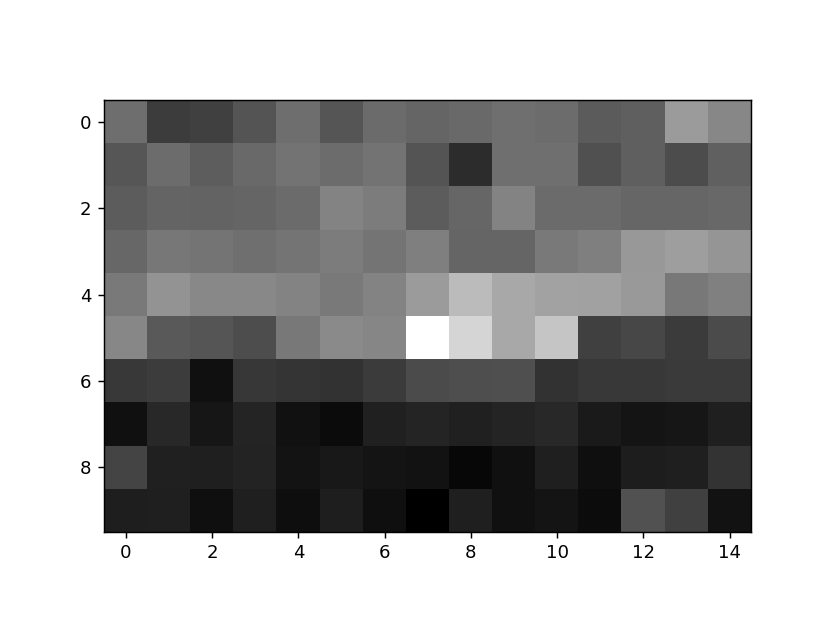

In [16]:
ref = ndescriptors[9,7]
print(ref)

d = np.sqrt(((ndescriptors-ref)**2).sum(axis=2))
plt.figure()
plt.imshow(d, cmap=plt.cm.gray)
plt.show()

C:\Users\8Utilisateur\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<IPython.core.display.Javascript object>


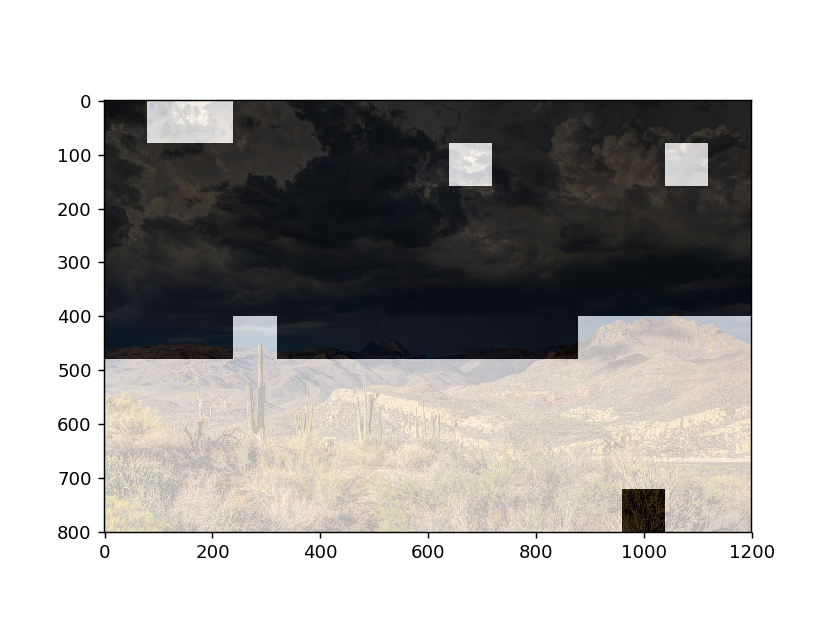

In [17]:
from skimage.transform import resize
from skimage.filters import threshold_otsu

d_ = resize(d, (im.shape[0],im.shape[1]), order=0, mode='reflect')
t = threshold_otsu(d_)
mask = d_<t

plt.figure()
plt.imshow(im)
plt.imshow(mask, cmap=plt.cm.gray, alpha=0.7)
plt.show()